<a href="https://colab.research.google.com/github/northropb-2/test1/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





#load the titanic dataset

df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [148]:
df.tail()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [149]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [150]:
df.drop(['class',"embarked",'alive'],axis=1,inplace=True)

In [151]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


In [152]:
df.drop("deck",axis=1,inplace=True)

<Axes: >

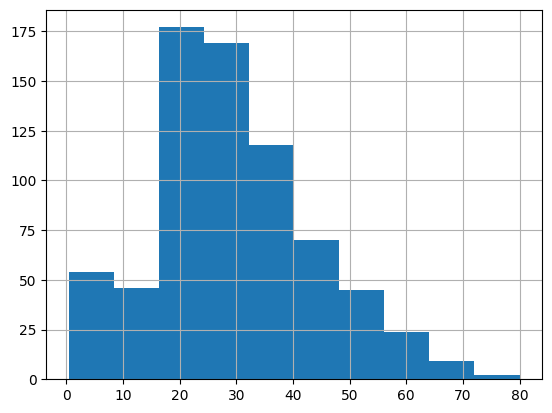

In [153]:
df["age"].hist()

In [154]:
df["age"].fillna(df["age"].median(),inplace=True)

/tmp/ipython-input-2039613669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(),inplace=True)


In [155]:
df.dropna(subset=["embark_town"],inplace=True)

In [156]:
df.duplicated().sum()

np.int64(116)

In [157]:
df.shape

(889, 11)

In [158]:
df.drop_duplicates(inplace=True)

In [159]:
df.shape

(773, 11)

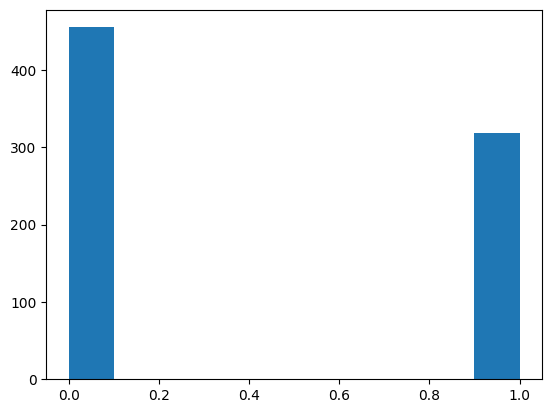

In [160]:
plt.hist(df["survived"])
plt.show()

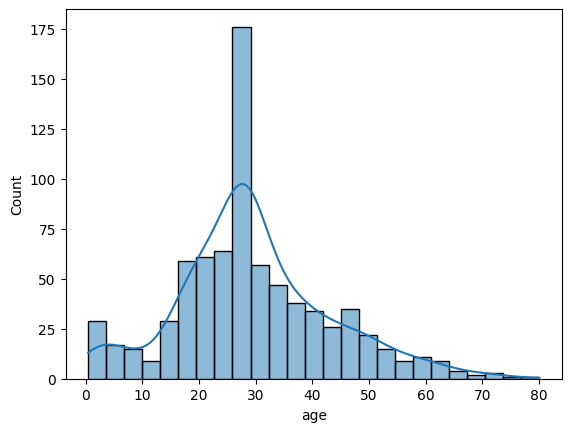

In [161]:
sns.histplot(df['age'],kde=True)
plt.show()

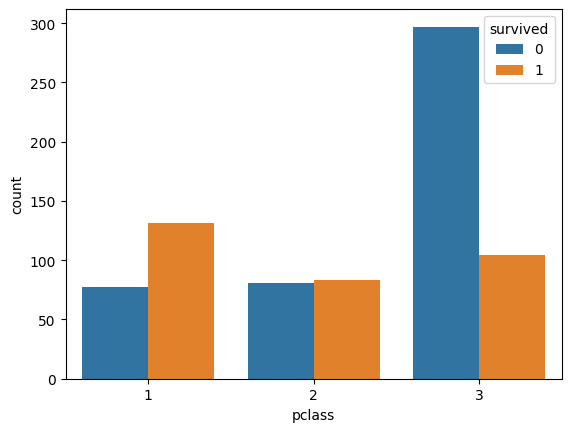

In [162]:
sns.countplot(data=df,x='pclass',hue='survived')
plt.show()

In [163]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     773 non-null    int64  
 1   pclass       773 non-null    int64  
 2   sex          773 non-null    object 
 3   age          773 non-null    float64
 4   sibsp        773 non-null    int64  
 5   parch        773 non-null    int64  
 6   fare         773 non-null    float64
 7   who          773 non-null    object 
 8   adult_male   773 non-null    bool   
 9   embark_town  773 non-null    object 
 10  alone        773 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 61.9+ KB


In [165]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
#df['sex'] = lle.fit_transform(df[sex])

df['who']=le.fit_transform(df['who'])
df['adult_male']=le.fit_transform(df['adult_male'])
df['alone']=le.fit_transform(df['alone'])
df['embark_town']=le.fit_transform(df['embark_town'])

In [166]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,1,1,2,0
1,1,1,female,38.0,1,0,71.2833,2,0,0,0
2,1,3,female,26.0,0,0,7.9250,2,0,2,1
3,1,1,female,35.0,1,0,53.1000,2,0,2,0
4,0,3,male,35.0,0,0,8.0500,1,1,2,1


In [167]:
dummies=pd.get_dummies(df["sex"]).astype(int)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
887,1,0
888,1,0
889,0,1


In [168]:
df = pd.concat([df,dummies,],axis="columns")
df

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,female,male
0,0,3,male,22.0,1,0,7.2500,1,1,2,0,0,1
1,1,1,female,38.0,1,0,71.2833,2,0,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,2,0,2,1,1,0
3,1,1,female,35.0,1,0,53.1000,2,0,2,0,1,0
4,0,3,male,35.0,0,0,8.0500,1,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,2,0,1,0,1,0
887,1,1,female,19.0,0,0,30.0000,2,0,2,1,1,0
888,0,3,female,28.0,1,2,23.4500,2,0,2,0,1,0
889,1,1,male,26.0,0,0,30.0000,1,1,0,1,0,1


In [169]:
df.drop("sex",axis=1,inplace=True)

In [170]:
df

,survived,pclass,age,sibsp,parch,fare,who,adult_male,embark_town,alone,female,male
0,0,3,22.0,1,0,7.2500,1,1,2,0,0,1
1,1,1,38.0,1,0,71.2833,2,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,2,0,2,1,1,0
3,1,1,35.0,1,0,53.1000,2,0,2,0,1,0
4,0,3,35.0,0,0,8.0500,1,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,2,0,1,0,1,0
887,1,1,19.0,0,0,30.0000,2,0,2,1,1,0
888,0,3,28.0,1,2,23.4500,2,0,2,0,1,0
889,1,1,26.0,0,0,30.0000,1,1,0,1,0,1


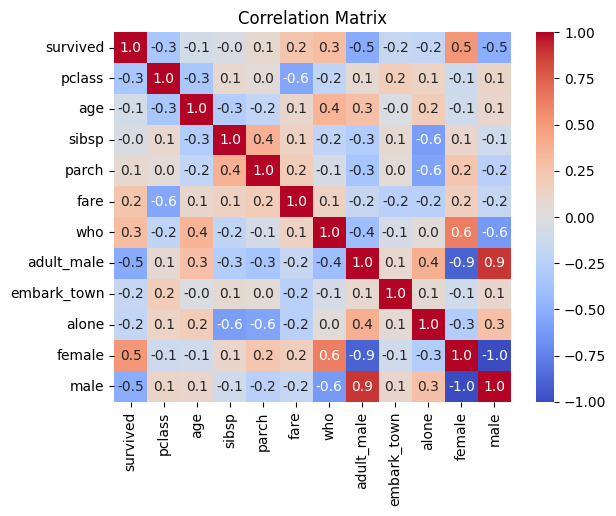

In [171]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True,fmt='0.01f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [172]:
df.drop(["male","female"],axis=1,inplace=True)

Text(0.5, 1.0, 'Correlation between survived and other features')

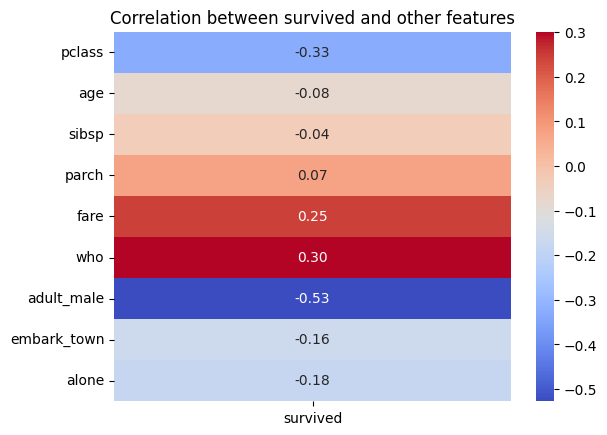

In [173]:
survived_corr = df.corr()['survived']
survived_corr = survived_corr.drop('survived')
sns.heatmap(survived_corr.to_frame(),annot=True, fmt='.2f',cmap='coolwarm',
            cbar=True, annot_kws={'size':10})
plt.title('Correlation between survived and other features')

In [174]:
df.drop(["age","sibsp","parch"],axis=1,inplace=True)

<Axes: >

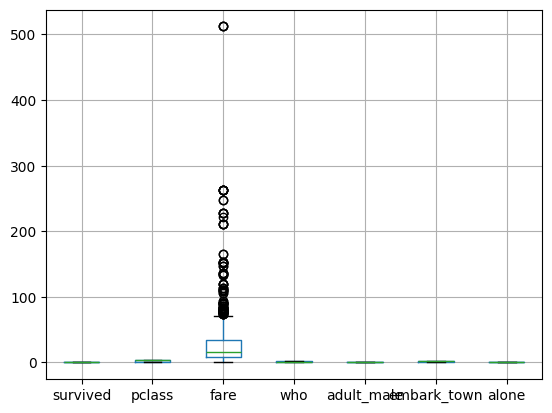

In [175]:
df.boxplot()

In [185]:
def remove_outliers_iqr(df , exclude_column):
  for col in df.columns:
    if col == exclude_column:
      continue
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df


   #Specify the column to exclude

df_cleaned = remove_outliers_iqr(df , exclude_column='survived')
df=df_cleaned
df

,survived,pclass,fare,who,adult_male,embark_town,alone
0,0,3,7.2500,1,1,2,0
1,1,1,71.2833,2,0,0,0
2,1,3,7.9250,2,0,2,1
3,1,1,53.1000,2,0,2,0
4,0,3,8.0500,1,1,2,1
...,...,...,...,...,...,...,...
885,0,3,29.1250,2,0,1,0
887,1,1,30.0000,2,0,2,1
888,0,3,23.4500,2,0,2,0
889,1,1,30.0000,1,1,0,1


In [184]:
df.shape


(773, 7)

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

#import pandas

X = df[['pclass', 'fare', 'embark_town', "pclass", "who" ,"adult_male", "alone"]]
y = df['survived']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


#train a basline logistic regression model

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.79


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
